In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt # visualization
#from PIL import Image
%matplotlib inline
import seaborn as sns   # data visualization
import itertools
import warnings
warnings.filterwarnings('ignore')
import io
import plotly.offline as py     # data visualization
py.init_notebook_mode(connected=True)   #data visualization
import plotly.graph_objs as go #data visualization
import plotly.figure_factory as ff  # data visualization

In [2]:
data = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 2 Data pre processing part1

## 2.1 missing data

In [6]:
# change null value of TotalCharges to nan

data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
print(data.isnull().any())
# delete TotalCharges of "nan" value，percentage of nan = value/total = 0.015%
data= data[data['TotalCharges'].notnull()]
data= data.reset_index()[data.columns]

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool


In [7]:
# change value to float
data['TotalCharges'] = data['TotalCharges'].astype(float)

# change ‘No internet service’ to ‘No'
replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in replace_cols:
    data[i] = data[i].replace({'No internet service': 'No'})

# replace string with binary
data['SeniorCitizen'] = data['SeniorCitizen'].replace({1:'Yes', 0:'No'})

# change Tenure value to range 
def tenure_lab(data):
    if data['tenure'] <= 12:
        return 'Tenure_0_12'
    elif (data['tenure'] > 12) & (data['tenure'] <= 24):
        return 'Tenure_12_24'
    elif (data['tenure'] > 24) & (data['tenure'] <= 48):
        return 'Tenure_24_48'
    elif (data['tenure'] > 48) & (data['tenure'] <= 60):
        return 'Tenure_48_60'
    elif data['tenure'] > 60:
        return 'Tenure_gt_60'
data['tenure_group'] = data.apply(lambda data: tenure_lab(data), axis=1)

# seperate customer into "churn" or "not churn" group
churn = data[data['Churn'] == 'Yes']
not_churn = data[data['Churn'] == 'No']

# Separate categorical variables from numeric variables
Id_col = ['customerID']
target_col = ['Churn']
cat_cols = data.nunique()[data.nunique()<6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]
num_cols = [x for x in data.columns if x not in cat_cols+target_col+Id_col]
# binary
bin_cols = data.nunique()[data.nunique()==2].keys().tolist()
# multityp
multi_cols = [i for i in cat_cols if i not in bin_cols]


# Metadata (data of data)

<!-- ### metadata
This concept may not be familiar to everyone, the Metaverse has been so popular recently, everyone should understand it haha! -->
### What is metadata?
Metadata, also known as intermediary data, or data about data.

### Why is it important to do a project?
Because when working on projects, we often encounter data with high dimensions and many features. In order to facilitate further analysis, we must organize the data in a structured way, so metadata is a good start.

### What's the use of metadata?
It is mainly to describe the properties of the data, which is of great significance for the organization and structure of the data, as well as for future data analysis, visualization, and modeling.

In [8]:
data[cat_cols].describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,No,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,2,No,5017
OnlineBackup,7032,2,No,4607
DeviceProtection,7032,2,No,4614


In [9]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [10]:
data[bin_cols].describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,No,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
OnlineSecurity,7032,2,No,5017
OnlineBackup,7032,2,No,4607
DeviceProtection,7032,2,No,4614
TechSupport,7032,2,No,4992
StreamingTV,7032,2,No,4329


In [11]:
data[multi_cols].describe().T

,count,unique,top,freq
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
Contract,7032,3,Month-to-month,3875
PaymentMethod,7032,4,Electronic check,2365
tenure_group,7032,5,Tenure_0_12,2175


In [12]:
#name
meta_name = data.columns
#role
meta_role = ['ID（not attributes）']+["attributes"]*(len(meta_name)-3)+ ['target（churn or not）']+["attributes"]
#type
meta_dtype = data.dtypes
#remain
meta_remain = ['False']+["True"]*(len(meta_name)-1)
meta_scale = ['nominal']
meta_unique = ['n/a']
#meta_na = []
#meta_na_per = []
for i in range(len(meta_name)):
    #unique
    if meta_dtype[i] == 'float64':
        meta_unique.append('n/a')
    elif i !=0:
        temp_unique = data[meta_name[i]].unique()
        meta_unique.append(len(temp_unique))
    #type
    if meta_name[i]  in bin_cols:
        meta_scale.append("binary")
    elif meta_name[i] in multi_cols:
        meta_scale.append("nominal")
    elif meta_name[i]  in num_cols:
        meta_scale.append("interval")
#meta_scale[0],meta_scale[1] = ['nominal','binary']
meta = pd.DataFrame({'meta_name':meta_name,
                    "meta_role":meta_role,
                    "meta_scale":meta_scale,
                    "meta_dtype":meta_dtype,
                    "meta_remain":meta_remain,
                    "meta_unique":meta_unique}).set_index(['meta_name'])
meta

,meta_role,meta_scale,meta_dtype,meta_remain,meta_unique
meta_name,,,,,
customerID,ID（not attributes）,nominal,object,False,n/a
gender,attributes,binary,object,True,2
SeniorCitizen,attributes,binary,object,True,2
Partner,attributes,binary,object,True,2
Dependents,attributes,binary,object,True,2
tenure,attributes,interval,int64,True,72
PhoneService,attributes,binary,object,True,2
MultipleLines,attributes,nominal,object,True,3
InternetService,attributes,nominal,object,True,3


In [13]:
meta_des = meta.groupby(['meta_role','meta_scale']).size().to_frame().reset_index()
meta_des.columns=['meta_role','meta_scale','total']
meta_des

,meta_role,meta_scale,total
0,ID（not attributes）,nominal,1
1,attributes,binary,12
2,attributes,interval,3
3,attributes,nominal,5
4,target（churn or not）,binary,1


# 3 EDA
## 3.1 Customer Churn

In [14]:
# customer churn label
label = data['Churn'].value_counts().keys().tolist()
# corresponding value
val = data['Churn'].value_counts().values.tolist()
trace = go.Pie(labels=label, values=val,
               marker=dict(
                   colors=['blue', 'red'],
                   line=dict(color='white',
                             width=1.3)
               ),
               rotation=90, hoverinfo='label+value+text',
               hole=0.5)
layout = go.Layout(
    dict(
        title='Customer attribution in data',
        plot_bgcolor='rgb(243, 243, 243)',
        paper_bgcolor='rgb(243, 243, 243)', # white color
    ))
data1 = [trace]
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig)


## 3.2 Variable Distribution

In [15]:
#Define a function to generate a pie chart of the attributes of customers 
def plot_pie_function (column):
    trace1 = go.Pie(values=churn[column].value_counts().values.tolist(),
                    labels=churn[column].value_counts().keys().tolist(),
                    hoverinfo='label+percent+name',
                    domain=dict(x=[0, 0.48]),
                    name='Churn Customer',
                    marker=dict(line=dict(width=2,
                                          color='rgb(243, 243, 243)')),
                    hole=0.5,
                    )
    trace2 = go.Pie(values=not_churn[column].value_counts().values.tolist(),
                    labels=not_churn[column].value_counts().keys().tolist(),
                    hoverinfo='label+percent+name',
                    marker=dict(line=dict(width=2,
                                          color='rgb(243, 243, 243)')),
                    domain=dict(x=[0.52, 1]),
                    hole=0.5,
                    name='Non churn customers'
                    )
    layout = go.Layout(
        dict(
            title=column+' distribution in customer attrition',
            plot_bgcolor='rgb(245, 245, 245)',
            paper_bgcolor='rgb(245, 245, 245)',
            annotations = [dict(
                text = 'Churn Customer'
                , font = dict(size = 10)
                , showarrow = False
                , x = 0.3
                , y = 0.5
            ),
            dict(
                text = 'Non Churn Customer'
                , font = dict(size = 10)
                , showarrow = False
                , x = 0.8
                , y = 0.5
            )]
        )
    )
    data2=[trace1, trace2]
    fig=go.Figure(data=data2, layout=layout)
    py.iplot(fig)

In [16]:
for i in cat_cols:
    plot_pie_function(i)

In [17]:
#define a function  to draw histogram for attrition 
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 

    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non Churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [18]:
for i in num_cols : # histograms are more suitable for numeric varaibles
    histogram(i)

## 3.3 Customer churn grouped by tenure

In [19]:
# churn group by tenure
tg_ch = churn['tenure_group'].value_counts().reset_index()
tg_ch.columns = ['tenure_group', 'count']
tg_nch = not_churn['tenure_group'].value_counts().reset_index()
tg_nch.columns = ['tenure_group', 'count']

In [20]:
# use hist
# for churn 
trace1 = go.Bar(x=tg_ch['tenure_group'], y=tg_ch['count'], 
                name='Churn Customers', 
                marker=dict(line=dict(width=0.5, 
                                      color='black')), 
                opacity=0.9)
# for non-churn
trace2 = go.Bar(x=tg_nch['tenure_group'], y=tg_nch['count'],
                name='Non Churn Customers', 
                marker=dict(line=dict(width=0.5, 
                                      color='black')), 
                opacity=0.9)
layout = go.Layout(dict(
    title='Customer Attrition in tenure groups', 
    plot_bgcolor='rgb(255, 255, 255)', 
    paper_bgcolor='rgb(255, 255, 255)', 
    xaxis=dict(gridcolor='rgb(243, 243, 243)', 
               title='count', 
               zerolinewidth=1, 
               ticklen=5, 
               gridwidth=2)
))
data3 = [trace1, trace2]
fig = go.Figure(data=data3, layout=layout)
py.iplot(fig)

The number of churned customers gradually decreases as the tenure length increases. There are generally more non-churn than churn customers for all tenure durations, with tenure duration of 60 months (5 years) containing the largest proportion of non churn customers. Tenure durations of 0-12 months also have the highest proportion of churn customers. 

It shows that short-term contract customers are more likely to churn, whilst customers that stay longer with a Telco company have a smaller propensity to churn.

## 3.4 Average spend grouped by tenure

In [21]:
avg_tgc = data.groupby(['tenure_group', 'Churn'])[['MonthlyCharges', 'TotalCharges']].mean().reset_index()

# function for getting parameters
def mean_charges(column, aggregate):
    tracer = go.Bar(x=avg_tgc[avg_tgc['Churn']==aggregate]['tenure_group'],
                    y=avg_tgc[avg_tgc['Churn']==aggregate][column],
                    name=aggregate, marker=dict(line=dict(width=1)),
                    text='Churn')
    return tracer

def layout_plot(title, xaxis_lab, yaxis_lab):
    layout = go.Layout(title = title, plot_bgcolor='rgb(255, 255, 255)',
                       paper_bgcolor='rgb(255, 255, 255)',
                       xaxis=dict(gridcolor='rgb(243, 243, 243)', title=xaxis_lab,
                                  zerolinewidth=1, ticklen=5, gridwidth=2),
                       yaxis=dict(gridcolor='rgb(255, 255, 255)', title=yaxis_lab,
                                  zerolinewidth=1, ticklen=5, gridwidth=2))
    return layout
# fig1 : monthly average spend grouped by tenure
trace1 = mean_charges('MonthlyCharges', 'Yes')
trace2 = mean_charges('MonthlyCharges', 'No')
layout1 = layout_plot('Average Monthly Charges by Tenure groups', 'Tenure group', 'Monthly Charges')
data4 = [trace1, trace2]
fig1 = go.Figure(data=data4, layout=layout1)


py.iplot(fig1)

Regardless if customers churn or not, the average monthly consumption of customers increases steadily as the duration  which they stay with the company increases.
Regardless of the duration, the average monthly spending of non-churned customers is lower than the average monthly spending of churned customers.

This can show that one of the reasons for the loss of customers is that prices of bills generated from these Telco services are too high, or higher than the ideal amount customers expect.

In [22]:
# fig 2: the average total spend grouped by the tenure variable
trace3 = mean_charges('TotalCharges', 'Yes')
trace4 = mean_charges('TotalCharges', 'No')
layout2 = layout_plot('Average Total Charges by Tenure groups', 'Tenure group', 'Total Charges')
data5 = [trace3, trace4]
fig2 = go.Figure(data=data5, layout=layout2)
py.iplot(fig2)

Regardless of whether the customer churns or not, the longer a customer stays with a company, the more they will consume services of the Telco company. However, we can see that the total consumption of churned customers is gradually higher than that of non-churned customers.
This can show that one of the reasons for the loss of customers is that prices of bills generated from these Telco services are too high, or higher than the ideal amount customers expect.

## Conclusion
This part mainly analyzes the loss of users, and the overall loss rate is 26.25%. It is analyzed from three perspectives: 1. user type, 2. service attributes, 3. contract information (payment method, payment amount). 

<b>Here are our findings:</b>

<b>User types: </b> Age of a customer and whether they have children or a partner has a great impact on the attrition rate. Older users without any children or a partner are found to be a group of high churners.

<b>Service attributes: </b> We have found that users who use fiber-optic Internet services are more likely to churn. Sub-services under network services also have an impact on churn.

<!-- Guarantee services can reduce the churn rate, while entertainment services will increase the churn rate, which may be related to users. Unexpectedly caused. -->

<b>Payment methods: </b> Users who sign long-term contracts of 1 or 2 years have a higher likelihood of staying loyal to the company, whilst users who pay using electronic cheques and paperless bills are more likely to churn. 

<b>Payment amount: </b> Lost users are concentrated in three areas, which are a.20; b.45-55; c.75-100. The two ranges with the highest churn rates are 28-48, 68-109

Our conclusion will be further developed in our report! 

##  3.5 Customer lifetime value (LTV)analysis

In [23]:
#type changed
Telco_Data=data.copy()
#Character conversion >> Numeric
for i in ['Churn','Partner','Dependents','PhoneService','PaperlessBilling']:
    Telco_Data[i]=data[i].apply(lambda x:1 if x=='Yes' else 0)
for i in ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    Telco_Data[i]=data[i].apply(lambda x:1 if x=='Yes' else (0 if x=='No' else np.nan))
Telco_Data['gender']=data['gender'].apply(lambda x:1 if x=='Male' else 0)
#Total Payment Numerical Conversion
#Telco_Data['TotalCharges']=data['TotalCharges'].convert_objects()
Telco_Data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)
Telco_Data.loc[Telco_Data['TotalCharges'].isnull(),'TotalCharges']=Telco_Data[Telco_Data['TotalCharges'].isnull()].MonthlyCharges

#### According to the used monthly tenure as the grouping basis (tenure=0 is classified into 1 for calculation), the attrition rate of each group, the average monthly payment ARPU and the total historical payment are calculated respectively. User remaining value = ARPU/(1-churn rate)

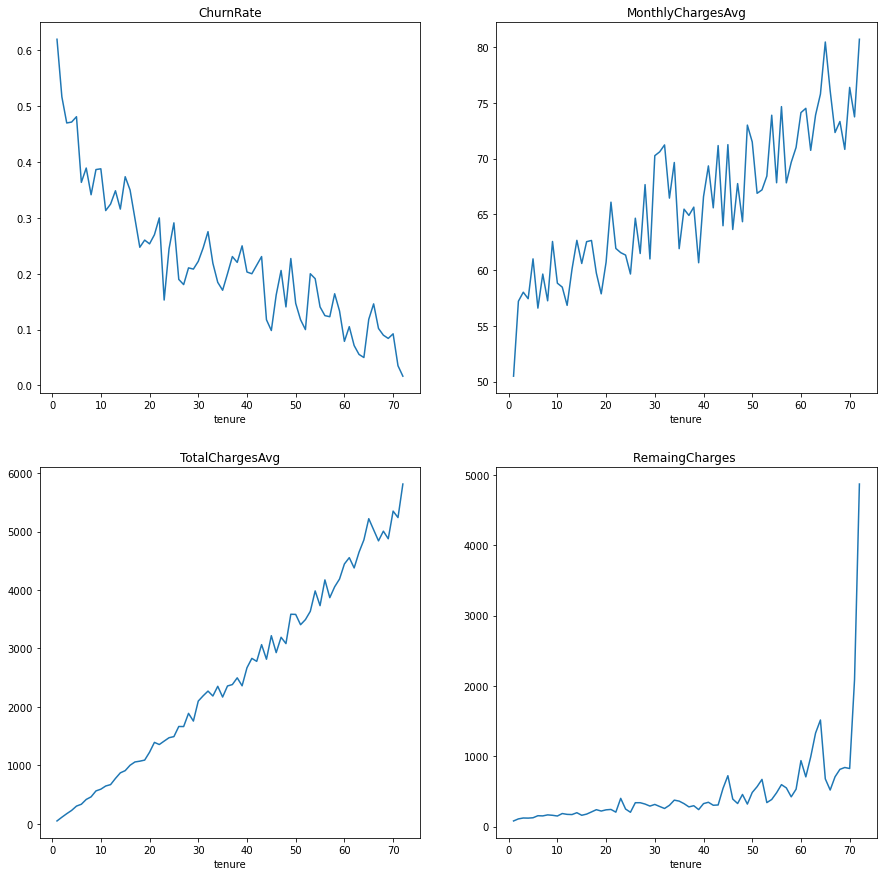

In [24]:
Telco_Data_LTV=Telco_Data.copy()
IDXtelco=Telco_Data_LTV.loc[Telco_Data_LTV.tenure==0].index
Telco_Data_LTV.loc[IDXtelco,'tenure']=1
Telco_Data_LTV=Telco_Data_LTV.groupby(by='tenure').agg({'Churn':'mean','customerID':'count','MonthlyCharges':'mean','TotalCharges':'mean'})
Telco_Data_LTV.columns=['ChurnRate','CustomerNum','MonthlyChargesAvg','TotalChargesAvg']
Telco_Data_LTV['RemaingCharges']=Telco_Data_LTV['MonthlyChargesAvg']/Telco_Data_LTV['ChurnRate']
fig,ax=plt.subplots(2,2,figsize=(15,15))
Telco_Data_LTV.ChurnRate.plot(ax=ax[0,0],title='ChurnRate')
Telco_Data_LTV.MonthlyChargesAvg.plot(ax=ax[0,1],title='MonthlyChargesAvg')
Telco_Data_LTV.TotalChargesAvg.plot(ax=ax[1,0],title='TotalChargesAvg')
Telco_Data_LTV.RemaingCharges.plot(ax=ax[1,1],title='RemaingCharges ')

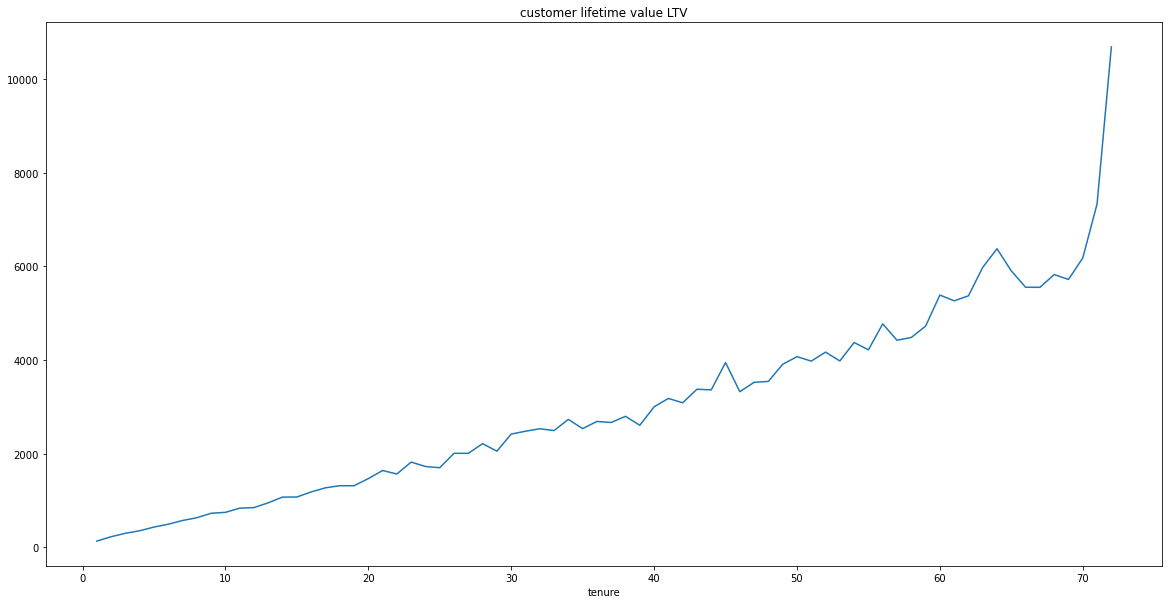

In [25]:
Telco_Data_LTV['LTV']=Telco_Data_LTV['TotalChargesAvg']+Telco_Data_LTV['RemaingCharges']
Telco_Data_LTV['LTV'].plot(title='customer lifetime value LTV',figsize=(20,10))
#ChurnRate，CustomerNum，MonthlyChargesAvg，TotalChargesAvg，RemaingCharges 
#LTV=TotalChargesAvg+RemaingCharges

#### The longer the service is used, the higher the total value of the user's life cycle, which is in line with our hypothesis. It is important to note that the total lifetime value of users who have used the service for 72 months is particularly high, due to their extremely low churn rate and they can be considered as the core users of Telecom companies.

#### This shows that every long-term user can bring stable and continuous benefits to the company. The telecom industry should pay more attention to the loss of users and cultivate long-term users. If we can predict user churn and formulate targeted countermeasures for churn users, it will bring lasting and consistent revenue.

## 4 Data Preprocessing part 2
### 4.1 Encoding, Standardization

In [26]:
# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

Id_col = ['customerID']

cat_cols = data.nunique()[data.nunique()<6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

num_cols = [x for x in data.columns if x not in cat_cols+target_col+Id_col]

bin_cols = data.nunique()[data.nunique()==2].keys().tolist()

multi_cols = [i for i in cat_cols if i not in bin_cols]

# label encoding
le = LabelEncoder()
for i in bin_cols:
    data[i] = le.fit_transform(data[i])
    

data = pd.get_dummies(data=data, columns=multi_cols)

# standardization
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

# Delete the original numeric column and merge the standardized numeric column with the original data table
df_telcom_og = data.copy()
data = data.drop(columns=num_cols, axis=1)
data = data.merge(scaled, left_index=True, right_index=True, how='left')


## 4.2 Correlation

In [27]:
summary = (df_telcom_og[[i for i in df_telcom_og.columns if i not in Id_col]].describe().transpose().reset_index())
summary = summary.rename(columns={'index':'feature'})
summary = np.around(summary, 3)

val_list = [summary['feature'], summary['count'], summary['mean'], summary['std'],
            summary['min'], summary['25%'], summary['50%'], summary['75%'], summary['max']]
trace = go.Table(header=dict(values=summary.columns.tolist(),
                             line=dict(color=['#506784']),
                             fill=dict(color=['#119DFF'])),
                 cells=dict(values=val_list,
                            line=dict(color=['#506784']),
                            fill=dict(color=['lightgrey', '#F5F8FF'])),
                 columnwidth=[200, 60, 100, 100, 60, 60, 80, 80, 80])
layout = go.Layout(dict(title='Variable Summary'))
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

#%%
# delete tenure_group
data = data.drop(columns=['tenure_group_Tenure_0_12', 'tenure_group_Tenure_12_24', 'tenure_group_Tenure_24_48',
                              'tenure_group_Tenure_48_60', 'tenure_group_Tenure_gt_60'], axis=1)


In [28]:
# correlation 
corr =data.corr()
# matrix label
matrix_cols = corr.columns.tolist()
# transfer to array
corr_array = np.array(corr)

# plot
trace = go.Heatmap(z=corr_array, x=matrix_cols, y=matrix_cols, 
                   colorscale='Viridis', colorbar=dict(
        title='Pearson Correlation Coefficient', 
        titleside='right'
                   ))
layout = go.Layout(dict(title='Correlation Matrix for variables', 
                        autosize=False, height=720, width=800, 
                        margin=dict(r=0, l=210, t=25, b=210), 
                        yaxis=dict(tickfont=dict(size=9)), 
                        xaxis=dict(tickfont=dict(size=9))))
data10 = [trace]
fig = go.Figure(data=data10, layout=layout)
py.iplot(fig)


#### The variables with outstanding performance in the positive correlation are:  
1. correlation coefficient between total consumption and the duration: <b>0.826</b>, a strong positive correlation
2. correlation coefficient between total consumption and monthly consumption: <b>0.651</b>, a strong positive correlation
3. correlation coefficient between Internet services: <b>0.78</b>, a very strong positive correlation
4. correlation coefficient between monthly consumption and the opening of digital movies and digital TV is slightly greater than <b>0.62</b>, a strong positive correlation correlation.

#### The variables that are worth noting in the negative correlation are: 
1. correlation coefficient between the monthly contract and the duration of the contract: <b>-0.65</b>, a strong negative correlation
2. correlation coefficient monthly consumption and whether to open Internet services: <b>-0.76</b>, a strong negative correlation

## 4.3 PCA with visualization

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = data[[i for i in data.columns if i not in Id_col+target_col]]
Y = data[target_col+Id_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_data = pca_data.merge(Y, left_index=True, right_index=True, how='left')
pca_data['Churn'] = pca_data['Churn'].replace({1:'Churn', 0:'Not Churn'})

def pca_scatter(target, color):
    tracer = go.Scatter(x=pca_data[pca_data['Churn']==target]['PC1'],
                        y=pca_data[pca_data['Churn']==target]['PC2'],
                        name=target, mode='markers',
                        marker=dict(color=color, line=dict(width=0.5), symbol='diamond-open'),
                        text='Customer Id:' + pca_data[pca_data['Churn']==target]['customerID'])
    return tracer
layout = go.Layout(dict(title='Visualising data with prinsipal components',
                        plot_bgcolor='rgb(243,243,243)',
                        paper_bgcolor='rgb(243,243,243)',
                        xaxis=dict(gridcolor='rgb(255,255,255)',
                                   title='principal component 1',
                                   zerolinewidth=1, ticklen=5, gridwidth=2),
                        yaxis=dict(gridcolor='rgb(255,255,255)',
                                   title='principal component 2',
                                   zerolinewidth=1, ticklen=5, gridwidth=2),
                        height=600))
trace1 = pca_scatter('Churn', 'red')
trace2 = pca_scatter('Not Churn', 'royalblue')
data11 = [trace2, trace1]
fig = go.Figure(data=data11, layout=layout)
py.iplot(fig)


### PCA tries to extract two principal components (PC1, PC2) to explain the data
#### As can be seen from the above figure, the scatter plot generated using two principal components is classified according to whether or not a customer is lost, and there are still many intersections of the scatter points. However, the parts with high scatter density can still be properly distinguished.
#### The above code gives the extraction and visualization method of PCA, and represents the two principal components extracted that contribute to the largest variance, and can be used to distinguish whether the customer is truly lost whilst reducing dimensionality.

## 4.4 Visualization of customer persona

In [30]:
# separate bin varaible
bi_cs = data.nunique()[data.nunique()==2].keys()
dat_rad = data[bi_cs]

# Create a radar chart of churned and non-churned customers
def plot_radar(df, aggregate, title):
    data_frame = df[df['Churn']==aggregate]
    data_frame_x = data_frame[bi_cs].sum().reset_index()
    data_frame_x.columns = ['feature', 'yes']
    data_frame_x['no'] = data_frame.shape[0] - data_frame_x['yes']
    data_frame_x = data_frame_x[data_frame_x['feature'] != 'Churn']

    # count yes
    trace1 = go.Scatterpolar(r=data_frame_x['yes'].values.tolist(),
                             theta=data_frame_x['feature'].tolist(),
                             fill='toself', name='count of 1\'s', mode='markers+lines',
                             marker=dict(size=5))
    # count no
    trace2 = go.Scatterpolar(r=data_frame_x['no'].values.tolist(),
                             theta=data_frame_x['feature'].tolist(),
                             fill='toself', name='count of 0\'s', mode='markers+lines',
                             marker=dict(size=5))
    layout = go.Layout(dict(polar=dict(radialaxis=dict(visible=True,
                                                       side='counterclockwise',
                                                       showline=True,
                                                       linewidth=2,
                                                       tickwidth=2,
                                                       gridcolor='white',
                                                       gridwidth=2),
                                       angularaxis=dict(tickfont=dict(size=10),
                                                        layer='below traces'),
                                       bgcolor='rgb(243,243,243)'),
                            paper_bgcolor='rgb(243,243,243)',
                            title=title, height=700))
    data12 = [trace2, trace1]
    fig = go.Figure(data=data12, layout=layout)
    py.iplot(fig)

# plot
plot_radar(dat_rad, 1, 'Churn - Customers')


#### Figure 1
#### 1. Amongst the lost customers, they have not renewed their contracts for 1 or 2 years, and there are many customers who have not subscribed to a network service.
#### 2. Amongst the lost customers, there are many customers who sign contracts on a monthly basis, activated telephone services, and use paperless bills.
#### First of all, the telephone service of the communication company is a basic service, so it is generally used regardless of whether or not customers are churning.
#### Secondly, customers who use short-term contracts may not be as committed to staying with a company, and are only using the company's products for the short term, and are more likely to be lost later.
#### Customers who have not opened network services are more likely to churn, as they are not invested in the ecosystem of the Telco company. It can be seen that improving the quality of network services can increase customer loyalty.
#### It is also necessary to pay attention to the feedback of customers on the delivery method of paperless bills, which may be because paperless bills could be easily overlooked by customers compared to paper bills, resulting in unreasonable deductions and misunderstandings by the company, resulting in loss of customers.

In [31]:
plot_radar(dat_rad, 0, 'Non Churn - Customers')

#### Figure 2
<!-- #### Judging from the shadow area of ​​whether or not to open the service, the majority of customers who have not opened the service -->
#### The radar graph has shown that customers that also sign up for multiple lines have a very little tendency to churn, highlighting how if customers are deeply invested in multiple services with a single company, it is very unlikely that they will leave. 

## 5. Retention forecast


## 5.1.1 Generate training set and test set with SMOTE

In [32]:
from sklearn.model_selection import train_test_split
cols = [i for i in data.columns if i not in Id_col+target_col]

original_X = data[cols]
original_Y = data[target_col]

# train/test split
train_X1, x_test1, train_Y1, y_test1 = train_test_split(
    original_X, original_Y, test_size=.25, random_state=111)



x_train1 = pd.DataFrame(data=train_X1, columns=cols)
y_train1 = pd.DataFrame(data=train_Y1, columns=target_col)


In [33]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

cols = [i for i in data.columns if i not in Id_col+target_col]

smote_X = data[cols]
smote_Y = data[target_col]

# train/test split
train_X, x_test, train_Y, y_test = train_test_split(
    smote_X, smote_Y, test_size=.25, random_state=111)

# using smote over sampling
os = SMOTE(random_state=0)
train_X, train_Y= os.fit_resample(train_X, train_Y)
x_train = pd.DataFrame(data=train_X, columns=cols)
y_train = pd.DataFrame(data=train_Y, columns=target_col)

#x_test = pd.DataFrame(data=test_X, columns=cols)
#y_test = pd.DataFrame(data=test_Y, columns=target_col)
#x_train.shape

## 5.1.2 Generate training set and test set with GAN

In [77]:
train_X

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,1,0,1,1,0,0,...,1,0,0,0,0,1,0,-0.139417,0.698109,0.069244
1,0,0,0,0,1,1,1,0,1,0,...,0,1,0,0,0,1,0,1.327365,0.832733,1.571223
2,0,1,0,0,1,0,1,1,0,1,...,1,0,0,0,0,1,0,-1.035784,0.005046,-0.789571
3,0,0,1,0,1,1,0,1,0,0,...,1,0,0,0,0,0,1,-1.117272,0.801154,-0.806998
4,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0.268022,-0.466969,-0.119959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,1,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,-1.145040,0.172473,-0.879992
7786,1,1,1,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0.099248,1.028467,0.453071
7787,1,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,1,-1.280248,-0.532835,-0.985847
7788,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,-1.010676,0.556044,-0.729647


In [103]:
import torch.nn as nn
import torch

#process = pd.DataFrame(train_X,columns=[f'fea{i}' for i in range(1,train_X.shape[1] + 1)])
process = train_X
process['target'] = train_Y

X_for_generate = process.query("target == 1").iloc[:,:-1].values
X_non_default = process.query('target == 0').iloc[:,:-1].values
X_for_generate = torch.tensor(X_for_generate).type(torch.FloatTensor)

n_generate = X_non_default.shape[0] - X_for_generate.shape[0]

In [104]:
X_for_generate

tensor([[ 0.0000,  0.0000,  1.0000,  ..., -1.1173,  0.8012, -0.8070],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.2680, -0.4670, -0.1200],
        [ 0.0000,  0.0000,  0.0000,  ..., -1.2802, -0.1545, -0.9808],
        ...,
        [ 1.0000,  0.0000,  0.0000,  ..., -1.2802, -0.5328, -0.9858],
        [ 1.0000,  0.0000,  0.0000,  ..., -1.0107,  0.5560, -0.7296],
        [ 0.0000,  1.0000,  0.0000,  ...,  0.8085,  0.6169,  0.9354]])

In [107]:
import torch.nn as nn
import torch

# para
BATCH_SIZE = 50
LR_G = 0.0001           
LR_D = 0.0001           
N_IDEAS = 20            # Initial idea for G generator (random inspiration)


G = nn.Sequential(                      # generator
    nn.Linear(N_IDEAS, 128),            
    nn.ReLU(),
    nn.Linear(128, 28),     
)


D = nn.Sequential(                      # discriminator
    nn.Linear(28, 128),     
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid(),                       # 0-1
)

# optimizator
opt_D = torch.optim.Adam(D.parameters(),lr=LR_D)
opt_G = torch.optim.Adam(G.parameters(),lr=LR_G)


# GAN
for step in range(3000):
    # Randomly select BATCH real samples with label 1
    chosen_data = np.random.choice((X_for_generate.shape[0]),size=(BATCH_SIZE),replace=False)
    artist_paintings = X_for_generate[chosen_data,:]
    # Generate fake samples using generators
    G_ideas = torch.randn(BATCH_SIZE, N_IDEAS, requires_grad=True)           
    G_paintings = G(G_ideas)                  
    
    prob_artist1 = D(G_paintings)               
    # loss
    G_loss = torch.mean(torch.log(1. - prob_artist1))
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()
    
    prob_artist0 = D(artist_paintings)
    prob_artist1 = D(G_paintings.detach())
    # loss
    D_loss = - torch.mean(torch.log(prob_artist0) + torch.log(1. - prob_artist1))
    opt_D.zero_grad()
    D_loss.backward(retain_graph=True)
    opt_D.step()

    
#GAN fake data
fake_data = G(torch.randn(n_generate,N_IDEAS)).detach().numpy()
#X_default = pd.DataFrame(np.concatenate([X_for_generate,fake_data]),columns=[f'fea{i}' for i in range(train_X.shape[1])])
X_default = pd.DataFrame(np.concatenate([X_for_generate,fake_data]))
X_default['target'] = 1
#X_non_default = pd.DataFrame(X_non_default,columns=[f'fea{i}' for i in range(1,train_X.shape[1] + 1)])
X_non_default = pd.DataFrame(X_non_default)
X_non_default['target'] = 0
train_data_gan = pd.concat([X_default,X_non_default])

X_gan = train_data_gan.iloc[:,:-1]
y_gan = train_data_gan.iloc[:,-1]

print(X_gan.shape,y_gan.shape)



(7790, 28) (7790,)


In [108]:
X_gan

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.117272,0.801154,-0.806998
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.268022,-0.466969,-0.119959
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.280248,-0.154509,-0.980826
3,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.076528,0.644924,-0.778321
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.198760,-1.494098,-0.979238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3890,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.490341,0.295900,1.148212
3891,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.268022,-0.787739,-0.302765
3892,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.531085,0.480384,1.521457
3893,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.919926,-0.159495,0.455658


#### Considering that the problem focuses on the churn rate, we should try to find all the churned users and target them as much as possible. Therefore, the recall rate of the model should be improved when predicting. Note: Lost users in the sample only account for 1/4 of the sample. 
#### The SMOTE algorithm could be used to balance and improve the data set.

## 5.3 Testing with a single model

### 5.3.1 Random Forest

### Grid Search  is used to search for the best parameter of our model

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import model_selection

#RF模型调参
rf_est = RandomForestClassifier(warm_start=True,max_features='sqrt',
                            min_samples_split=3,min_samples_leaf=2,n_jobs=-1,verbose=0)
rf_param_grid = {'n_estimators': [700], 'max_depth': [8],'min_samples_split':[10],'min_samples_leaf':[20]}
#n_estimators:[500,600,700,800,900,1000]
#max_depth:[6,8,10,12,15,20]
#min_samples_split:range(10, 90, 20)
#min_samples_leaf:range(5, 65, 10),
rf_grid = model_selection.GridSearchCV(rf_est, rf_param_grid, n_jobs=-1, cv=10, verbose=1,scoring=None)
rf_grid.fit(x_train, y_train)
print('RandomForest best parameter',rf_grid.best_params_)
print('RandomForest best score',rf_grid.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Users/zijiaopan/opt/anaconda3/envs/prof/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/zijiaopan/opt/anaconda3/envs/prof/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/zijiaopan/opt/anaconda3/envs/prof/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/zijiaopan/opt/anaconda3/envs/prof/lib/python3

RandomForest best parameter {'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 700}
RandomForest best score 0.7933247753530166


The prediction accuracy of the model on the test set：
 0.7582480091012515
The predicted recall of the model on the test set：
 0.773469387755102


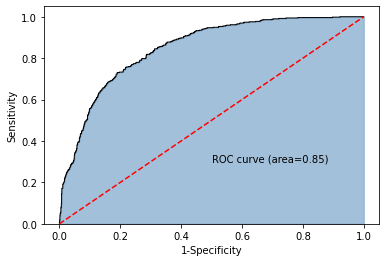

In [37]:
#RF model fitting
rf = RandomForestClassifier(max_depth=8, n_estimators=700,warm_start=False,max_features='auto',min_samples_leaf=20,
                            min_samples_split=10,n_jobs=-1,verbose=0)
rf.fit(x_train,y_train)
y_predict = rf.predict(x_test)
y_predict_proba = rf.predict_proba(x_test)[:,1]

RST=[];AST=[];RST.append(y_predict);AST.append(y_predict_proba)
#model result visualization
from sklearn import metrics
print('The prediction accuracy of the model on the test set：\n',metrics.accuracy_score(y_test,y_predict))
print('The predicted recall of the model on the test set：\n',metrics.recall_score(y_test,y_predict))
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict_proba)
roc_auc=metrics.auc(fpr,tpr)
plt.stackplot(fpr,tpr,alpha=0.5,edgecolor='black',color='steelblue')
plt.plot(fpr,tpr,lw=1,color='black')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.text(x=0.5,y=0.3, s="ROC curve (area=%0.2f)" % roc_auc)
plt.show()

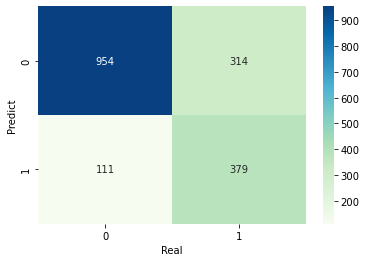

In [38]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,y_predict)#=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

In [54]:
rf = RandomForestClassifier(max_depth=8, n_estimators=700,warm_start=False,max_features='auto',min_samples_leaf=20,
                            min_samples_split=10,n_jobs=-1,verbose=0)
rf.fit(X_gan,y_gan)
y_predict = rf.predict(x_test)
y_predict_proba = rf.predict_proba(x_test)[:,1]

RST=[];AST=[];RST.append(y_predict);AST.append(y_predict_proba)
#model result visualization
from sklearn import metrics
print('The prediction accuracy of the model on the test set：\n',metrics.accuracy_score(y_test,y_predict))
print('The predicted recall of the model on the test set：\n',metrics.recall_score(y_test,y_predict))
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict_proba)
roc_auc=metrics.auc(fpr,tpr)
plt.stackplot(fpr,tpr,alpha=0.5,edgecolor='black',color='steelblue')
plt.plot(fpr,tpr,lw=1,color='black')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.text(x=0.5,y=0.3, s="ROC curve (area=%0.2f)" % roc_auc)
plt.show()

NameError: name 'RandomForestClassifier' is not defined

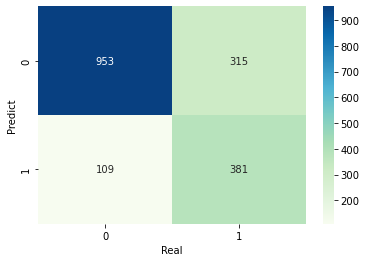

In [110]:
cm=metrics.confusion_matrix(y_test,y_predict)#=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

### Random Forest with row data (without dealing with imbalance)

The prediction accuracy of the model on the test set：
 0.7957906712172924
The predicted recall of the model on the test set：
 0.45510204081632655


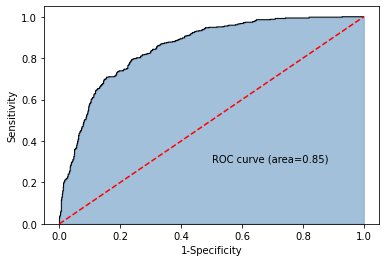

In [39]:
rf = RandomForestClassifier(max_depth=8, n_estimators=700,warm_start=False,max_features='auto',min_samples_leaf=20,
                            min_samples_split=10,n_jobs=-1,verbose=0)
rf.fit(x_train1,y_train1)
y_predict1 = rf.predict(x_test)
y_predict_proba1 = rf.predict_proba(x_test)[:,1]

RST=[];AST=[];RST.append(y_predict1);AST.append(y_predict_proba)
#model result visualization
from sklearn import metrics
print('The prediction accuracy of the model on the test set：\n',metrics.accuracy_score(y_test1,y_predict1))
print('The predicted recall of the model on the test set：\n',metrics.recall_score(y_test1,y_predict1))
fpr,tpr,threshold=metrics.roc_curve(y_test1,y_predict_proba1)
roc_auc=metrics.auc(fpr,tpr)
plt.stackplot(fpr,tpr,alpha=0.5,edgecolor='black',color='steelblue')
plt.plot(fpr,tpr,lw=1,color='black')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.text(x=0.5,y=0.3, s="ROC curve (area=%0.2f)" % roc_auc)
plt.show()

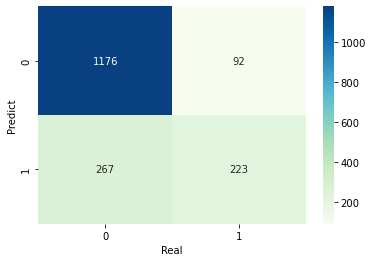

In [40]:
cm=metrics.confusion_matrix(y_test1,y_predict1)#=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

#### reason why GAN underperformed : gan works better only with very imbalanced data (e.g. 5% inbalanced rate). GAN and SMOTE result is similar, so we have decided to only use SMOTE

### 5.3.2 Decision Tree

In [54]:
#DTmodel parameter selection
dt_est = DecisionTreeClassifier()
dt_param_grid = {'max_depth': [5,8,16,20]}
dt_grid = model_selection.GridSearchCV(dt_est, dt_param_grid, n_jobs=-1, cv=10,verbose=1,scoring='recall')
dt_grid.fit(x_train, y_train)
print('DecisionTree best parameter',dt_grid.best_params_)
print('DecisionTree best score',dt_grid.best_score_)


Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


DecisionTree best parameter {'max_depth': 8}
DecisionTree best score 0.8318356867779204


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished


The prediction accuracy of the model on the test set：
 0.7292377701934016
The predicted recall of the model on the test set：
 0.763265306122449


Text(0.5, 0.3, 'ROC curve (area=0.82)')

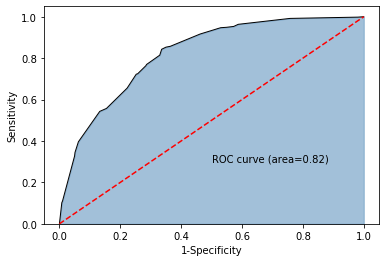

In [55]:
#DT model
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)
y_predict = dt.predict(x_test)
y_predict_proba = dt.predict_proba(x_test)[:,1]
RST.append(y_predict);AST.append(y_predict_proba)
#model fitting result
from sklearn import metrics
print('The prediction accuracy of the model on the test set：\n',metrics.accuracy_score(y_test,y_predict))
print('The predicted recall of the model on the test set：\n',metrics.recall_score(y_test,y_predict))
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict_proba)
roc_auc=metrics.auc(fpr,tpr)
plt.stackplot(fpr,tpr,alpha=0.5,edgecolor='black',color='steelblue')
plt.plot(fpr,tpr,lw=1,color='black')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.text(x=0.5,y=0.3, s="ROC curve (area=%0.2f)" % roc_auc)

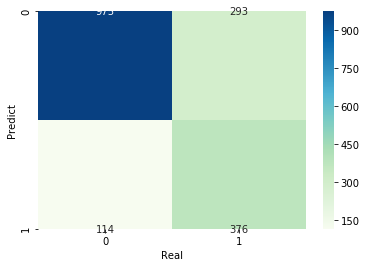

In [56]:
#confusion matrix
cm==metrics.confusion_matrix(y_test,y_predict)#
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

### 5.3.3 AdaBoost

In [57]:
#Ada model parameter selection
ada_est=AdaBoostClassifier(n_estimators=100,learning_rate=0.5)
ada_param_grid = {'n_estimators': [100,200,300,400,500,600]}
#n_estimators:[500,600,700,800,900,1000]
ada_grid = model_selection.GridSearchCV(ada_est, ada_param_grid, n_jobs=-1, cv=10, verbose=1,scoring=None)
ada_grid.fit(x_train, y_train.values.ravel())
print('AdaBoost best parameter',ada_grid.best_params_)
print('AdaBoost best score',ada_grid.best_score_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.8s finished


AdaBoost best parameter {'n_estimators': 600}
AdaBoost best score 0.8390243902439024


The prediction accuracy of the model on the test set：
 0.7696245733788396
The predicted recall of the model on the test set：
 0.7857142857142857


Text(0.5, 0.3, 'ROC curve (area=0.85)')

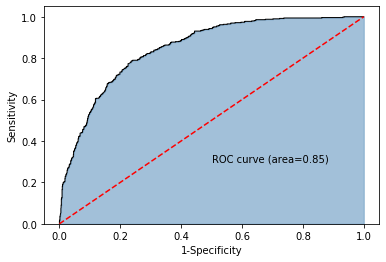

In [58]:
#Ada model fitting
ada=AdaBoostClassifier(n_estimators=300,learning_rate=0.1)
ada.fit(x_train,y_train)
y_predict = ada.predict(x_test)
y_predict_proba = ada.predict_proba(x_test)[:,1]
RST.append(y_predict);AST.append(y_predict_proba)
#model result visualization

print('The prediction accuracy of the model on the test set：\n',metrics.accuracy_score(y_test,y_predict))
print('The predicted recall of the model on the test set：\n',metrics.recall_score(y_test,y_predict))
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict_proba)
roc_auc=metrics.auc(fpr,tpr)
plt.stackplot(fpr,tpr,alpha=0.5,edgecolor='black',color='steelblue')
plt.plot(fpr,tpr,lw=1,color='black')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.text(x=0.5,y=0.3, s="ROC curve (area=%0.2f)" % roc_auc)


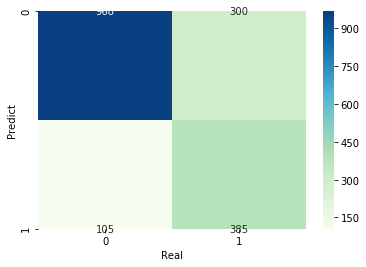

In [59]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,y_predict)#=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

### 5.3.4 KNN

In [60]:
knn_est = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [100,200,300]}
knn_grid = model_selection.GridSearchCV(knn_est, knn_param_grid, n_jobs=-1, cv=10,verbose=1,scoring=None)
knn_grid.fit(x_train, y_train.values.ravel())
print('knn best parameter',knn_grid.best_params_)
print('knn best score',knn_grid.best_score_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


knn best parameter {'n_neighbors': 100}
knn best score 0.7589216944801027


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.2s finished


The prediction accuracy of the model on the test set：
 0.7138794084186576
The predicted recall of the model on the test set：
 0.8591836734693877


Text(0.5, 0.3, 'ROC curve (area=0.84)')

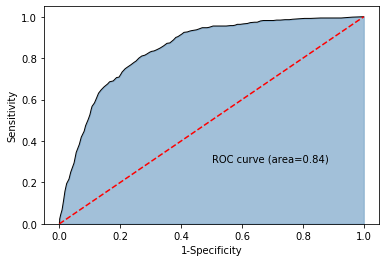

In [61]:
#KNN model fitting
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
y_predict_proba = knn.predict_proba(x_test)[:,1]
RST.append(y_predict);AST.append(y_predict_proba)
#model result visualization
from sklearn import metrics
print('The prediction accuracy of the model on the test set：\n',metrics.accuracy_score(y_test,y_predict))
print('The predicted recall of the model on the test set：\n',metrics.recall_score(y_test,y_predict))
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict_proba)
roc_auc=metrics.auc(fpr,tpr)
plt.stackplot(fpr,tpr,alpha=0.5,edgecolor='black',color='steelblue')
plt.plot(fpr,tpr,lw=1,color='black')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.text(x=0.5,y=0.3, s="ROC curve (area=%0.2f)" % roc_auc)


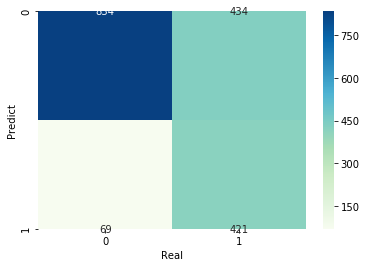

In [62]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,y_predict)#=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

### 5.3.5 Support Vector Machine (SVM)

In [55]:
# SVM
from sklearn.svm import SVC


# Use a linear hyperplane
svc_lin = SVC(C=0.8, cache_size=300, class_weight=None, coef0=0.0, decision_function_shape='ovr',
              degree=3, gamma=1.0, kernel='linear', max_iter=-1, probability=True,
              random_state=None, shrinking=True, tol=0.001, verbose=False)

svc_lin.fit(x_train,y_train)
y_predict = svc_lin.predict(x_test)
y_predict_proba = svc_lin.predict_proba(x_test)[:,1]
RST.append(y_predict);AST.append(y_predict_proba)
#model result visualization
from sklearn import metrics
print('The prediction accuracy of the model on the test set：\n',metrics.accuracy_score(y_test,y_predict))
print('The predicted recall of the model on the test set：\n',metrics.recall_score(y_test,y_predict))
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict_proba)
roc_auc=metrics.auc(fpr,tpr)
plt.stackplot(fpr,tpr,alpha=0.5,edgecolor='black',color='steelblue')
plt.plot(fpr,tpr,lw=1,color='black')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.text(x=0.5,y=0.3, s="ROC curve (area=%0.2f)" % roc_auc)

NameError: name 'x_train' is not defined

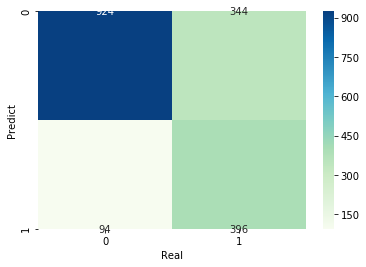

In [68]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,y_predict)#=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

### SVM nonlinear hyperplane 'rbf'

The prediction accuracy of the model on the test set：
 0.7622298065984073
The predicted recall of the model on the test set：
 0.5102040816326531


Text(0.5, 0.3, 'ROC curve (area=0.78)')

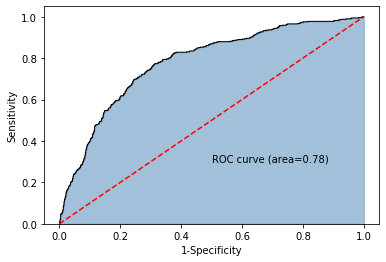

In [69]:
# Use nonlinear hyperplane 'rbf'
svc_rbf = SVC(C=0.8, cache_size=300, class_weight=None, coef0=0.0, decision_function_shape='ovr',
              degree=3, gamma=1.0, kernel='rbf', max_iter=-1, probability=True,
              random_state=None, shrinking=True, tol=0.001, verbose=False)
svc_rbf.fit(x_train,y_train)
y_predict = svc_rbf.predict(x_test)
y_predict_proba = svc_rbf.predict_proba(x_test)[:,1]
RST.append(y_predict);AST.append(y_predict_proba)
#model result visalization
from sklearn import metrics
print('The prediction accuracy of the model on the test set：\n',metrics.accuracy_score(y_test,y_predict))
print('The predicted recall of the model on the test set：\n',metrics.recall_score(y_test,y_predict))
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict_proba)
roc_auc=metrics.auc(fpr,tpr)
plt.stackplot(fpr,tpr,alpha=0.5,edgecolor='black',color='steelblue')
plt.plot(fpr,tpr,lw=1,color='black')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.text(x=0.5,y=0.3, s="ROC curve (area=%0.2f)" % roc_auc)


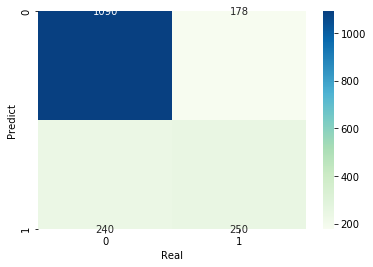

In [70]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,y_predict)#=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()


### 5.3.6  lightGBM

In [71]:
from lightgbm import LGBMClassifier

lgbm_est = LGBMClassifier()
lgbm_param_grid = {'n_estimators': [100,200,300]}
lgbm_grid = model_selection.GridSearchCV(lgbm_est, lgbm_param_grid, n_jobs=-1, cv=10,verbose=1,scoring=None)
lgbm_grid.fit(x_train, y_train.values.ravel())
print('lgbm best parameter',lgbm_grid.best_params_)
print('lgbm best score',lgbm_grid.best_score_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.5s finished


lgbm best parameter {'n_estimators': 100}
lgbm best score 0.8499358151476252


The prediction accuracy of the model on the test set：
 0.7889647326507395
The predicted recall of the model on the test set：
 0.6285714285714286


Text(0.5, 0.3, 'ROC curve (area=0.84)')

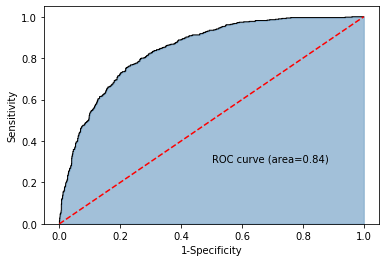

In [72]:
# LightGBMClassifier


lgbm_c = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.1, max_depth=5, min_child_samples=30, min_child_weight=0.001,
                        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=700, objective='binary',
                        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=10000, subsample_freq=0)

lgbm_c.fit(x_train,y_train)
y_predict = lgbm_c.predict(x_test)
y_predict_proba = lgbm_c.predict_proba(x_test)[:,1]
RST.append(y_predict);AST.append(y_predict_proba)
#model result visualization
from sklearn import metrics
print('The prediction accuracy of the model on the test set：\n',metrics.accuracy_score(y_test,y_predict))
print('The predicted recall of the model on the test set：\n',metrics.recall_score(y_test,y_predict))
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict_proba)
roc_auc=metrics.auc(fpr,tpr)
plt.stackplot(fpr,tpr,alpha=0.5,edgecolor='black',color='steelblue')
plt.plot(fpr,tpr,lw=1,color='black')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.text(x=0.5,y=0.3, s="ROC curve (area=%0.2f)" % roc_auc)


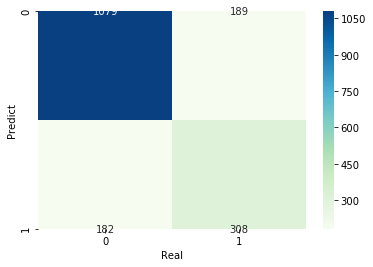

In [73]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,y_predict)#=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

### 5.3.7 XGBoost

The prediction accuracy of the model on the test set：
 0.7912400455062572
The predicted recall of the model on the test set：
 0.6836734693877551


Text(0.5, 0.3, 'ROC curve (area=0.84)')

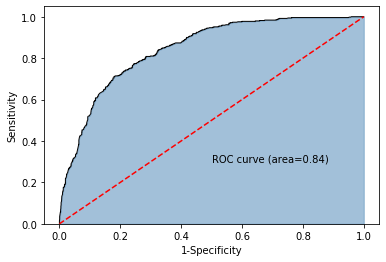

In [74]:
# XGBoost 
from xgboost import XGBClassifier
xgc = XGBClassifier(base_score=0.3, booster='gbtree', colsample_bylevel=1, colsample_bytree=1, 
                    gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2, min_child_weight=1, 
                    missing=1, n_estimators=100, n_jobs=1, nthread=None, objective='binary:logistic', 
                    random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,subsample=1,eval_metric='mlogloss')

xgc.fit(x_train,y_train)
y_predict = xgc.predict(x_test)
y_predict_proba = xgc.predict_proba(x_test)[:,1]
RST.append(y_predict);AST.append(y_predict_proba)
#model result visualization
from sklearn import metrics
print('The prediction accuracy of the model on the test set：\n',metrics.accuracy_score(y_test,y_predict))
print('The predicted recall of the model on the test set：\n',metrics.recall_score(y_test,y_predict))
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict_proba)
roc_auc=metrics.auc(fpr,tpr)
plt.stackplot(fpr,tpr,alpha=0.5,edgecolor='black',color='steelblue')
plt.plot(fpr,tpr,lw=1,color='black')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.text(x=0.5,y=0.3, s="ROC curve (area=%0.2f)" % roc_auc)


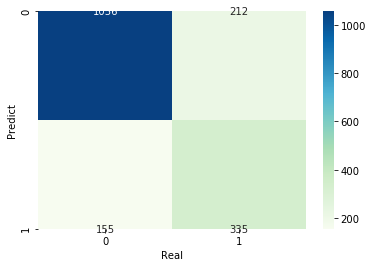

In [75]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,y_predict)#=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

### 5.3.8 Extra tree

In [76]:
#ET parameter selection
et_est=ExtraTreesClassifier()
et_param_grid = {'n_estimators': [600], 'max_depth': [8],'min_samples_leaf':[5],'min_samples_split':[10]}
#n_estimators:[500,600,700,800,900,1000]
#max_depth:[6,8,10,12,15,20]
#min_samples_split:range(10, 90, 20)
#min_samples_leaf:range(10, 60, 10),
et_grid = model_selection.GridSearchCV(et_est, et_param_grid, n_jobs=-1, cv=10,verbose=1,scoring=None)
et_grid.fit(x_train, y_train.values.ravel())
print('ExtraTree best parameter',et_grid.best_params_)
print('ExtraTree best score',et_grid.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    1.9s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.3s finished


ExtraTree best parameter {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 600}
ExtraTree best score 0.7984595635430038


The prediction accuracy of the model on the test set：
 0.764505119453925
The predicted recall of the model on the test set：
 0.7795918367346939


Text(0.5, 0.3, 'ROC curve (area=0.85)')

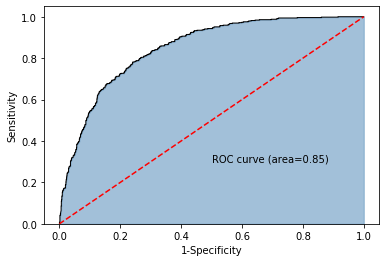

In [77]:
#ET model fitting
et=ExtraTreesClassifier(n_estimators=600,max_depth=8,min_samples_leaf=10,min_samples_split=20)
et.fit(x_train,y_train)
y_predict = et.predict(x_test)
y_predict_proba = et.predict_proba(x_test)[:,1]
RST.append(y_predict);AST.append(y_predict_proba)
#model result visualization
from sklearn import metrics
print('The prediction accuracy of the model on the test set：\n',metrics.accuracy_score(y_test,y_predict))
print('The predicted recall of the model on the test set：\n',metrics.recall_score(y_test,y_predict))
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict_proba)
roc_auc=metrics.auc(fpr,tpr)
plt.stackplot(fpr,tpr,alpha=0.5,edgecolor='black',color='steelblue')
plt.plot(fpr,tpr,lw=1,color='black')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.text(x=0.5,y=0.3, s="ROC curve (area=%0.2f)" % roc_auc)


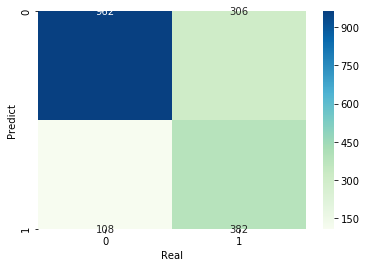

In [78]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,y_predict)#=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

### 5.3.9 GBDT 

In [79]:
#GBDT parameter selection
gb_est=ExtraTreesClassifier()
gb_param_grid = {'n_estimators': [100], 'max_depth': [5],'min_samples_leaf':[10],'min_samples_split':[20]}
#n_estimators:[500,600,700,800,900,1000]
#max_depth:[6,8,10,12,15,20]
#min_samples_split:range(10, 90, 20)
#min_samples_leaf:range(10, 60, 10),
gb_grid = model_selection.GridSearchCV(gb_est, gb_param_grid, n_jobs=-1, cv=10,verbose=1,scoring=None)
gb_grid.fit(x_train, y_train.values.ravel())
print('ExtraTree best parameter',gb_grid.best_params_)
print('ExtraTree best score',gb_grid.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished


ExtraTree best parameter {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 100}
ExtraTree best score 0.77201540436457


The prediction accuracy of the model on the test set：
 0.7519908987485779
The predicted recall of the model on the test set：
 0.7612244897959184


Text(0.5, 0.3, 'ROC curve (area=0.84)')

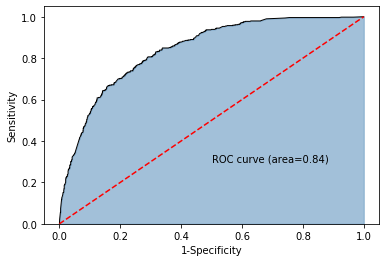

In [80]:
#gb model fitting
gb = GradientBoostingClassifier(n_estimators=100,learning_rate=0.008,min_samples_split=20,min_samples_leaf=10,max_depth=5,verbose=0)
gb.fit(x_train,y_train)
y_predict = gb.predict(x_test)
y_predict_proba = gb.predict_proba(x_test)[:,1]
RST.append(y_predict);AST.append(y_predict_proba)
#model result visualization
from sklearn import metrics
print('The prediction accuracy of the model on the test set：\n',metrics.accuracy_score(y_test,y_predict))
print('The predicted recall of the model on the test set：\n',metrics.recall_score(y_test,y_predict))
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict_proba)
roc_auc=metrics.auc(fpr,tpr)
plt.stackplot(fpr,tpr,alpha=0.5,edgecolor='black',color='steelblue')
plt.plot(fpr,tpr,lw=1,color='black')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.text(x=0.5,y=0.3, s="ROC curve (area=%0.2f)" % roc_auc)


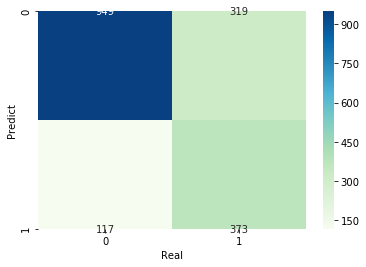

In [81]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,y_predict)#=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

### 5.3.10 Deeplearning ANN model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import SGD

classifier = Sequential()


In [35]:
classifier.add(Dense(units=14, kernel_initializer='uniform', activation='relu', input_dim=28))

#classifier.add(Dense(units=14, kernel_initializer='uniform', activation='relu'))
#classifier.add(Dense(units=7, kernel_initializer='uniform', activation='relu'))
#classifier.add(Dense(units=7, kernel_initializer='uniform', activation='relu'))

classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

#classifier.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
classifier.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])
#binary_crossentropy

history = classifier.fit(x_train,y_train, batch_size=10, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
779/779 [==============================] - 2s 2ms/step - loss: 0.6815 - accuracy: 0.6760 - val_loss: 0.6497 - val_accuracy: 0.7304
Epoch 2/100
779/779 [==============================] - 1s 1ms/step - loss: 0.5484 - accuracy: 0.7721 - val_loss: 0.5042 - val_accuracy: 0.7571
Epoch 3/100
779/779 [==============================] - 1s 1ms/step - loss: 0.4699 - accuracy: 0.7770 - val_loss: 0.4824 - val_accuracy: 0.7662
Epoch 4/100
779/779 [==============================] - 1s 1ms/step - loss: 0.4601 - accuracy: 0.7802 - val_loss: 0.4720 - val_accuracy: 0.7725
Epoch 5/100
779/779 [==============================] - 1s 1ms/step - loss: 0.4556 - accuracy: 0.7833 - val_loss: 0.4646 - val_accuracy: 0.7765
Epoch 6/100
779/779 [==============================] - 1s 1ms/step - loss: 0.4521 - accuracy: 0.7856 - val_loss: 0.4713 - val_accuracy: 0.7708
Epoch 7/100
779/779 [==============================] - 1s 1ms/step - loss: 0.4493 - accuracy: 0.7878 - val_loss: 0.4663 - val_accuracy: 0.7730

Epoch 58/100
779/779 [==============================] - 1s 973us/step - loss: 0.3832 - accuracy: 0.8236 - val_loss: 0.4650 - val_accuracy: 0.7736
Epoch 59/100
779/779 [==============================] - 1s 963us/step - loss: 0.3844 - accuracy: 0.8270 - val_loss: 0.4646 - val_accuracy: 0.7651
Epoch 60/100
779/779 [==============================] - 1s 943us/step - loss: 0.3822 - accuracy: 0.8275 - val_loss: 0.4828 - val_accuracy: 0.7594
Epoch 61/100
779/779 [==============================] - 1s 954us/step - loss: 0.3820 - accuracy: 0.8232 - val_loss: 0.4475 - val_accuracy: 0.7867
Epoch 62/100
779/779 [==============================] - 1s 969us/step - loss: 0.3816 - accuracy: 0.8235 - val_loss: 0.4438 - val_accuracy: 0.7873
Epoch 63/100
779/779 [==============================] - 1s 957us/step - loss: 0.3812 - accuracy: 0.8264 - val_loss: 0.4916 - val_accuracy: 0.7565
Epoch 64/100
779/779 [==============================] - 1s 932us/step - loss: 0.3815 - accuracy: 0.8264 - val_loss: 0.4938 -

In [36]:
test_pred_y_pra = classifier.predict(x_test)
#print(test_pred_y)
#print(test_pred_y.shape)
#Here we generate the predicted value of the test set y, found to be a number between 0-1


test_pred_y = (test_pred_y_pra > 0.5)
#print(test_pred_y)
#print(test_pred_y.shape)
#This will generate a discriminant value. If it is greater than 0.5, 
#it will become True. Otherwise, it will be Flase. 
#The overall length of test_pred_y remains unchanged, but the value becomes True and Flase

#accuracy
from sklearn.metrics import  accuracy_score
acc = accuracy_score(y_test,test_pred_y)
print('The prediction accuracy of the model on the test set：\n', acc)


The prediction accuracy of the model on the test set：
 0.782707622298066


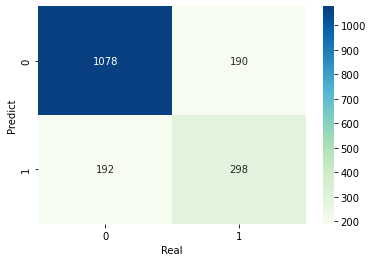

In [37]:
#confusion matrix
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_pred_y)
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

In [38]:
tn = cm[0][0]
fn = cm[1][0]
tp = cm[1][1]
fp = cm[0][1]

In [39]:

recall = tp/(tp+fn)
#f1_score = 2/(1/precision+1/recall)
print("recall:",recall)
#print("f1_score:",f1_score)

recall: 0.6081632653061224


The prediction accuracy of the model on the test set：
 0.782707622298066
The predicted recall of the model on the test set：
 0.6081632653061224


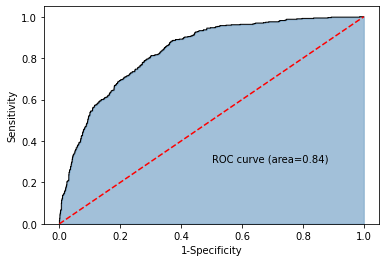

In [40]:
fpr,tpr,threshold=metrics.roc_curve(y_test, test_pred_y_pra)
roc_auc=metrics.auc(fpr,tpr)
plt.stackplot(fpr,tpr,alpha=0.5,edgecolor='black',color='steelblue')
plt.plot(fpr,tpr,lw=1,color='black')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.text(x=0.5,y=0.3, s="ROC curve (area=%0.2f)" % roc_auc)
print('The prediction accuracy of the model on the test set：\n', acc)
print('The predicted recall of the model on the test set：\n',recall)

## 5.4 Model fusion test

### Two model fusion strategies are adopted, Voting and Stacking are tested respectively.

### 5.4.1 Voting

The prediction accuracy of the model on the test set：
 0.7485779294653014
The predicted recall of the model on the test set：
 0.8244897959183674


Text(0.5, 0.3, 'ROC curve (area=0.85)')

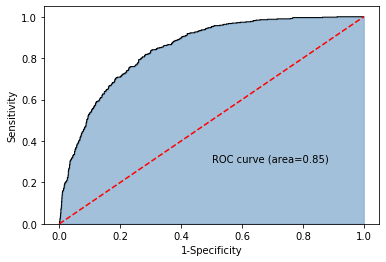

In [90]:
AVG=np.zeros((len(RST[0])))
AVG_Pred=np.zeros((len(AST[0])))
#The results of the previous models are weighted and averaged
for i in range(len(RST)):
    for j in range(len(RST[i])):
        AVG[j]=AVG[j]+RST[i][j]/6
        AVG_Pred[j]=AVG_Pred[j]+AST[i][j]/6
for j in range(len(AVG)):
    if(AVG[j]>0.5):
        AVG[j]=1.0
    else:
        AVG[j]=0.0
#VOTING result visualization
from sklearn import metrics
print('The prediction accuracy of the model on the test set：\n',metrics.accuracy_score(y_test,AVG))
print('The predicted recall of the model on the test set：\n',metrics.recall_score(y_test,AVG))
fpr,tpr,threshold=metrics.roc_curve(y_test,AVG_Pred)
roc_auc=metrics.auc(fpr,tpr)
plt.stackplot(fpr,tpr,alpha=0.5,edgecolor='black',color='steelblue')
plt.plot(fpr,tpr,lw=1,color='black')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.text(x=0.5,y=0.3, s="ROC curve (area=%0.2f)" % roc_auc)


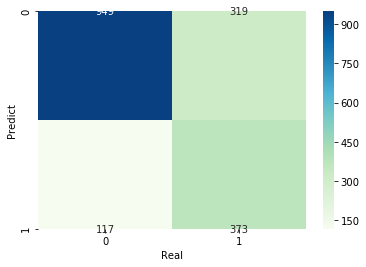

In [92]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,y_predict)#=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,cmap='GnBu',fmt='d')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

### 5.5 Summary of the forecast section

### Sections 4.4 and 4.5 use single-model and multi-model fusion methods to classify user churn. The main contents are:

<b>Model selection:</b> RandomForest, AdaBoost, DecisionTree, KNN, lightGBM, XGBoost，ExtraTree, GBDT and other models are used for prediction.

<b>Model optimization goal:</b> Considering that the problem focuses on the churn rate, we should try to find all the lost users and formulate a targetted policy. Therefore, the recall rate of the model should be improved when predicting. Note: Lost users in the sample only account for 1/4 of the sample. First, the SMOTE algorithm should be used to balance and improve the data set.

<b>Single-model prediction results:</b> After adjusting the parameters of the models, the AUC values ​​of the single-model are 0.83, 0.84, 0.84, 0.85, 0.85，0.82， 0.84， 0.83，and 0.77 respectively, indicating that these models can better predict customer churn. Voting, AdaBoost and KNN have recall rates on the test set that exceeds 82%.

<b>Model fusion:</b> Considering that a single learner may not be able to obtain stable prediction results, model fusion is further used for research, and  strategy of voting is used for fusion respectively.   The AUC value ​​of voting is 0.85 and the recall rate of voting is 0.824.

The recommended model is RandomForest, AdaBoost, SVM or Voting model.

## 6. Conclusion

### 6.1 Conclusion 

Through analysis, it is found that high churn users show the following characteristics: no partners or children, older, using fiber optic Internet service, additional entertainment services instead of guaranteed services, choosing monthly payment instead of annual payment, using electronic cheque methods, electronic bills and new users who have been with the company for less than half a year.


Through data mining, multiple classification prediction models were obtained, and the AUC value reached 0.85. Affected by the unbalanced data set, the accuracy of the model on the test set is not high, but the recall rate is above 80%, which sufficiently accounts for the vast majority of lost users.

There will be further elaboration on our conclusion in our report!

### 6.2 Suggestion 

Through the prediction model, users with a high possibility of churn are managed separately, and more targeted personalized package services are formulated to cultivate them into long-term users with high stickiness. It is important to utilise customer segmentation to better understand each customer group’s purchasing patterns, as different types of users have different price sensitivities, to personalize each plan’s payment amount and the benefits that should come with it. After understanding our customer persona, we have decided to address a few aspects of high churn customers. This will be further elaborated in our report!